In [35]:
import numpy as np
import matplotlib.pyplot as plt
import keras
!export KERAS_BACKEND=tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random



In [36]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [37]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."


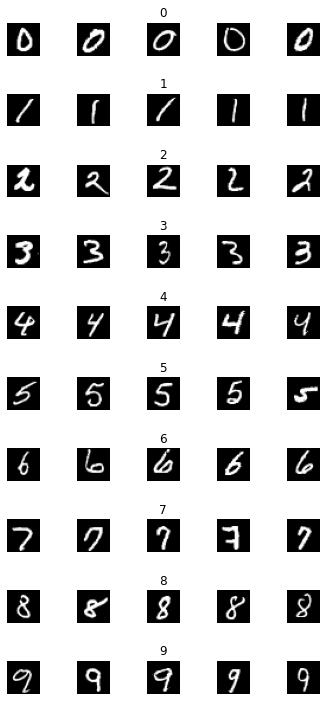

In [38]:
num_of_samples=[]
 
cols = 5
num_of_classes = 10
 
fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_of_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


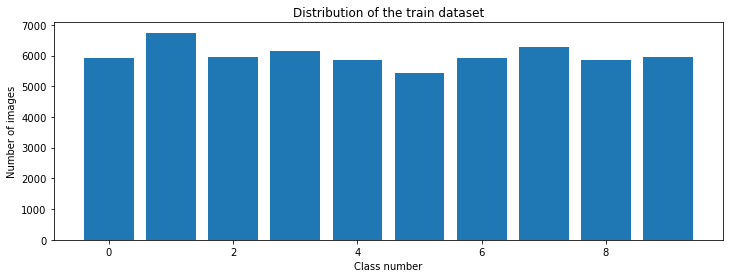

In [39]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [40]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##################
# Normalize data #
##################
X_train = X_train/255
X_test = X_test/255

In [41]:
def create_leNet():
  model = Sequential()
  # > 30 filters is efective
  # > strides = kernel step how much kernel is translated (the smaller the more computations)
  # > padding = to preserve the spatial dim. input size = output size. Here no padding since letters are centered 
  #   no interesting to preserve outer info
  # * input size = 28 x 28 x 1(depth) => parameters to train = 1(no. images) * 30 (no. filters) * 25 (since 5x5 =  25 the filter)  + 30 (biases) = 780
  # * output size = 24 x 24 x 30 (depth) due to the 5x5 filter
  model.add(Conv2D(30,(5,5), input_shape = (28,28,1), activation = 'relu'))
  # * input size = 24 x 24 x 30 (depth)
  # * output size = 12 x 12 x 30 (depth)
  model.add(MaxPooling2D(pool_size = (2,2)))
  # * input size = 12 x 12 x 30 (depth) => parameters = 30 (no. images) * 15(no. filters) * 9 (3x3 the filter) + 15 (biases) = 4065
  # * output size = 10 x 10 x 15 (depth)
  model.add(Conv2D(15,(3,3), activation = 'relu'))
  # * input size = 10 x 10 x 15 (depth)
  # * output size = 5 x 5 x 15 (depth)
  model.add(MaxPooling2D(pool_size = (2,2)))
  # * input size = 5 x 5 x 15 (depth)
  # * output size = 375
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  # Dropout Layer: Randomly sets nodes turned off, at each update during training, forces the network to use various combiantions of nodes
  # to classify the same data, forces to learn in more independent way [uniformly distributed]
  model.add(Dropout(0.5))
  model.add(Dense(num_of_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [11]:
model = create_leNet()
history = model.fit(x = X_train, y = y_train, epochs = 30, validation_split = 0.1, batch_size = 400,verbose = 1, shuffle = 'true')

Epoch 1/30
135/135 [==============================] - 14s 101ms/step - loss: 0.2293 - accuracy: 0.9249 - val_loss: 0.0622 - val_accuracy: 0.9837
Epoch 2/30
135/135 [==============================] - 13s 98ms/step - loss: 0.0734 - accuracy: 0.9776 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 3/30
135/135 [==============================] - 13s 98ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0431 - val_accuracy: 0.9860
Epoch 4/30
135/135 [==============================] - 14s 101ms/step - loss: 0.0515 - accuracy: 0.9847 - val_loss: 0.0384 - val_accuracy: 0.9897
Epoch 5/30
135/135 [==============================] - 13s 99ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0357 - val_accuracy: 0.9905
Epoch 6/30
135/135 [==============================] - 14s 106ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0304 - val_accuracy: 0.9925
Epoch 7/30
135/135 [==============================] - 13s 97ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0374 - val_accura

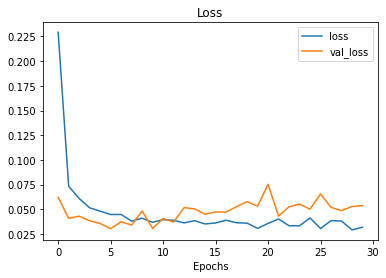

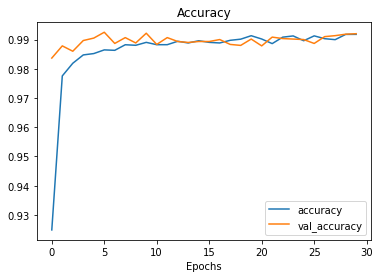

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show() 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=850x850 at 0x7F32EAEC8D60>
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Prediction for image '3' is : [2]


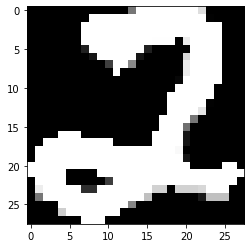

In [43]:
import requests
import cv2
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
print(img)
plt.imshow(img)

                
######################
#   Gray scale image #
######################
import cv2
img_array = np.asarray(img,dtype=np.uint8)
resized_img = cv2.resize(img_array, (28,28))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap = plt.get_cmap("gray"))

###############################
#   Prediction for the  image #
###############################
image = image/255
image = image.reshape(1, 28,28,1)
predicted_digit = model.predict_classes(image)


print("Prediction for image '2' is :", str(predicted_digit))

In [44]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score is : ",score[0])
print("Test accuracy is : ",score[1])


Test score is :  0.05184164270758629
Test accuracy is :  0.9883000254631042


In [47]:
# Print exactly what our Convolutional Layers are seeing
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)


visual_layer1 = layer1.predict(image)
visual_layer2 = layer2.predict(image)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


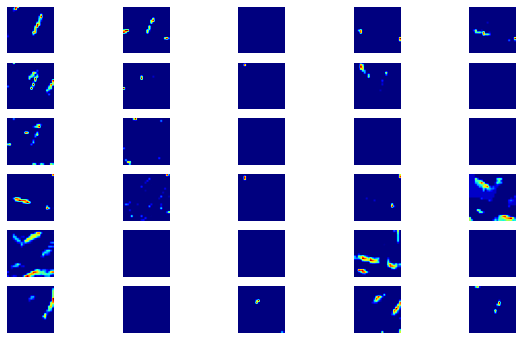

In [48]:
plt.figure(figsize = (10,6))
for i in range(30):
  plt.subplot(6,5, i + 1)
  plt.imshow(visual_layer1[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis("off")

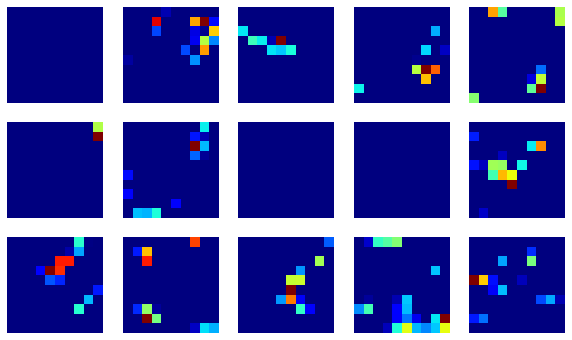

In [49]:
plt.figure(figsize = (10,6))
for i in range(15):
  plt.subplot(3,5, i + 1)
  plt.imshow(visual_layer2[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis("off")